<a href="https://colab.research.google.com/github/magno12345/Portafolio/blob/main/Final_NPL_Mac_Donalds_reviews_SOTELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción y Presentación del Problema



1.   Descripcion del Problema.



*   El objetivo de este proyecto es analizar las opiniones de los clientes sobre las tiendas de McDonald's en los Estados Unidos utilizando un dataset de más de 33,000 reseñas anónimas obtenidas de Google reviews.









2.   Contexto :


*   Entender las opiniones y experiencias de los clientes es crucial para mejorar la calidad del servicio y la satisfacción del cliente en las tiendas de McDonald's. Las reseñas en línea proporcionan una fuente rica de información para analizar estos aspectos.





#Objetivos del proyecto



1.   Objetivo General :

*   Desarrollar un modelo que pueda clasificar automáticamente las reseñas de McDonald's como positivas, negativas o neutrales.



2.   Objetivos especificos :


*   Recolectar y preprocesar el dataset de reseñas de McDonald's.

*   Entrenar modelos de NLP para el análisis de sentimientos utilizando Bag of Words, TF-IDF y Word Embedding.

*   Evaluar el rendimiento de los modelos utilizando métricas adecuadas.

*   Identificar las principales tendencias y patrones en las opiniones de los clientes.






#Justificacion y Relevancia.


*   Este análisis permitirá a McDonald's identificar áreas de mejora en sus servicios y productos, así como comprender mejor las expectativas y necesidades de sus clientes. Esto, a su vez, puede ayudar a mejorar la satisfacción del cliente y la fidelidad a la marca.




#Metodologia

1.   Recoleccion de datos:


*   Limpieza de datos y preparación (eliminación de duplicados, stopwords, tokenización, lematización).


2.   Representacion de textos:


*   Convertir los textos a representaciones numéricas usando:
*   Bag of Words (BoW)
*   TF-IDF
*   Word Embedding


3.   Entrenamiento de modelos:
* Entrenar modelos de clasificación (Naive Bayes, SVM, Deep Learning) usando las representaciones numéricas.
4.   Evaluacion de modelos:

*  Medir el rendimiento del modelo con métricas como precisión, recall, y F1-score
5.   Implementacion y Despliegue:
* Desplegar el modelo y preparar un informe con los resultados.



##**Lectura de Datos**

In [6]:
import pandas as pd
import requests
import chardet
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Descargar y cargar el archivo CSV
url = 'https://drive.google.com/uc?export=download&id=1y6PL5DcAjNc7mrmRDiDbFO8mBiPkCel3'
response = requests.get(url)
content = response.content

# Detectar la codificación
result = chardet.detect(content)
encoding = result['encoding']

# Leer el archivo CSV con la codificación detectada
df = pd.read_csv(url, encoding=encoding)

# Seleccionar solo las columnas 'review' y 'rating'
df_fil = df[['review', 'rating']].copy()

# Eliminar la palabra 'star' y convertir a números
df_fil['rating'] = df_fil['rating'].str.extract(r'(\d)').astype(int)

# Definir las etiquetas positivas y negativas
df_fil['sentiment'] = df_fil['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##**Preprocesamiento de texto**

In [7]:
#----------------------------------------------------------------------------------------------------------------#

# Limpieza del texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_fil['cleaned_review'] = df_fil['review'].apply(clean_text)

#-----------------------------------------------------------------------------------------------------------------#

# Tokenización
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

df_fil['tokenized_review'] = df_fil['cleaned_review'].apply(tokenize_text)

# Lematización y eliminación de stopwords
lemmatizer = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(tokens):
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
    return tokens

df_fil['processed_review'] = df_fil['tokenized_review'].apply(lemmatize_and_remove_stopwords)


 **Análisis Léxico y Morfológico**

In [8]:
from nltk import pos_tag

def pos_tag_filter(tokens):
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [word for word, tag in tagged_tokens if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ')]
    return filtered_tokens

# Aplicar POS tagging y filtrado
df_fil['filtered_review'] = df_fil['processed_review'].apply(pos_tag_filter)


**Análisis de Frecuencia de Palabras y Longitud de Reseñas**

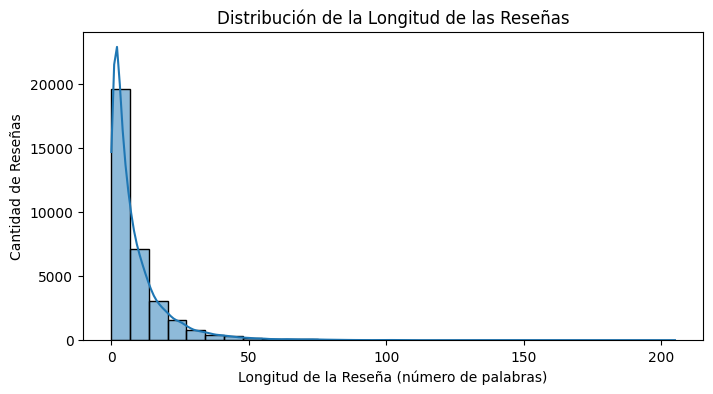

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Contar la frecuencia de cada palabra
all_words = [word for review in df_fil['filtered_review'] for word in review]
word_freq = Counter(all_words)

# Definir umbrales para palabras de alta y baja frecuencia
min_freq = 5
max_freq = 0.5 * len(df_fil)

# Filtrar palabras de alta y baja frecuencia
def remove_low_high_freq_words(tokens):
    return [word for word in tokens if min_freq <= word_freq[word] <= max_freq]

df_fil['final_review'] = df_fil['filtered_review'].apply(remove_low_high_freq_words)

# Unir tokens nuevamente en una cadena de texto
df_fil['final_review'] = df_fil['final_review'].apply(lambda x: ' '.join(x))

# Calcular la longitud de las reseñas en términos de número de palabras
df_fil['review_length'] = df_fil['final_review'].apply(lambda x: len(x.split()))

# Mostrar distribución de la longitud de las reseñas
plt.figure(figsize=(8, 4))
sns.histplot(df_fil['review_length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña (número de palabras)')
plt.ylabel('Cantidad de Reseñas')
plt.show()


**Nube de palabras.**

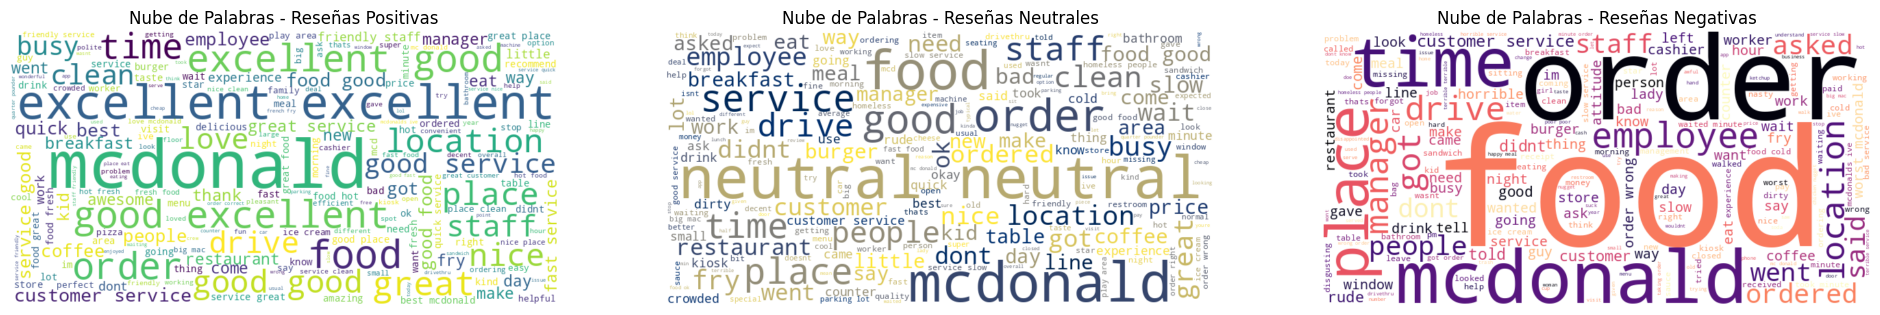

In [10]:
from wordcloud import WordCloud

# Dividir en reseñas positivas, neutrales y negativas
positive_reviews = df_fil[df_fil['rating'] >= 4]['final_review']
neutral_reviews = df_fil[df_fil['rating'] == 3]['final_review']
negative_reviews = df_fil[df_fil['rating'] <= 2]['final_review']

# Crear nubes de palabras
positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cividis').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_text)

# Mostrar nubes de palabras
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Positivas')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Neutrales')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Negativas')

plt.show()

**Análisis Sintáctico**

In [11]:
import spacy
from spacy import displacy

# Descargar el modelo de lenguaje inglés de spacy
nlp = spacy.load('en_core_web_sm')

# Parsing y Dependencia Sintáctica
def parse_and_analyze_dependencies(text):
    doc = nlp(text)
    return doc

# Aplicar el análisis sintáctico
df_fil['parsed_review'] = df_fil['final_review'].apply(parse_and_analyze_dependencies)

# Opciones para hacer el árbol más compacto
options = {
    "compact": True,
    "bg": "#fafafa",
    "color": "#000",
    "font": "Arial",
    "distance": 80
}


In [12]:
# Visualización del árbol sintáctico de la primera reseña
doc = df_fil['parsed_review'].iloc[0]
displacy.render(doc, style='dep', jupyter=True, options=options)

##**Modelo Bag of Words**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
# Asegúrate de que df_fil esté preparado con las columnas 'final_review' y 'sentiment'

X = df_fil['final_review']
y = df_fil['sentiment']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline de BoW con Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),
    LogisticRegression(max_iter=800)        # Clasificador lr
)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.880688622754491
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      3482
    positive       0.86      0.89      0.88      3198

    accuracy                           0.88      6680
   macro avg       0.88      0.88      0.88      6680
weighted avg       0.88      0.88      0.88      6680



Probar modelo

In [14]:
# Definir frases de prueba

test_phrases = [
    'The service was outstanding and the staff was very friendly.',
    'I absolutely loved the food, it was delicious.',
    'The ambiance was perfect for a relaxing dinner.',
    'I had a wonderful experience and will definitely return.',
    'The prices were reasonable and the portions were generous.',
    'The staff went above and beyond to make us feel welcome.',
    'I highly recommend this place for a great dining experience.',
    'The dessert was a delightful end to a fantastic meal.',
    'The restaurant was clean and well-maintained.',
    'The food quality was excellent, and the presentation was beautiful.',
    'I hate this place, the service was terrible.',
    'The food was cold and tasteless.',
    'I will never come back here again.',
    'The wait time was excessively long and frustrating.',
    'The prices are too high for the quality of food offered.',
    'The staff was rude and unprofessional.',
    'The restaurant was dirty and unkempt.',
    'I had a horrible experience and left feeling very disappointed.',
    'The portions were small and not worth the price.',
    'The noise level was unbearable, making it impossible to enjoy the meal.'
]
# Probar el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {prediction[0]}")
    print('-' * 50)

Phrase: The service was outstanding and the staff was very friendly.
Prediction: positive
--------------------------------------------------
Phrase: I absolutely loved the food, it was delicious.
Prediction: positive
--------------------------------------------------
Phrase: The ambiance was perfect for a relaxing dinner.
Prediction: positive
--------------------------------------------------
Phrase: I had a wonderful experience and will definitely return.
Prediction: positive
--------------------------------------------------
Phrase: The prices were reasonable and the portions were generous.
Prediction: positive
--------------------------------------------------
Phrase: The staff went above and beyond to make us feel welcome.
Prediction: negative
--------------------------------------------------
Phrase: I highly recommend this place for a great dining experience.
Prediction: positive
--------------------------------------------------
Phrase: The dessert was a delightful end to a fant

In [15]:
# Definir las etiquetas positivas y negativas
# Considerar 1-2 estrellas como negativas y 4-5 estrellas como positivas
df_fil['sentiment'] = df_fil['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Contar las reseñas positivas y negativas en el conjunto completo
print("Conteo de sentimientos en el conjunto completo:")
print(df_fil['sentiment'].value_counts())

# Contar las reseñas positivas y negativas en el conjunto de entrenamiento
print("\nConteo de sentimientos en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Contar las reseñas positivas y negativas en el conjunto de prueba
print("\nConteo de sentimientos en el conjunto de prueba:")
print(y_test.value_counts())

Conteo de sentimientos en el conjunto completo:
sentiment
negative    17335
positive    16061
Name: count, dtype: int64

Conteo de sentimientos en el conjunto de entrenamiento:
sentiment
negative    13853
positive    12863
Name: count, dtype: int64

Conteo de sentimientos en el conjunto de prueba:
sentiment
negative    3482
positive    3198
Name: count, dtype: int64


##**Modelo TF-IDF**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un pipeline de TF-IDF con Logistic Regression
pipeline_tf = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4)),  # Convertir texto en una matriz TF-IDF
    LogisticRegression(max_iter=1000)     # Clasificador Logistic Regression
)

# Entrenar el modelo
pipeline_tf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tf = pipeline_tf.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_tf)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_tf))

Accuracy: 0.8631736526946108
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      3482
    positive       0.89      0.82      0.85      3198

    accuracy                           0.86      6680
   macro avg       0.87      0.86      0.86      6680
weighted avg       0.86      0.86      0.86      6680



In [17]:
# Probar el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline_tf.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {prediction[0]}")
    print('-' * 50)

Phrase: The service was outstanding and the staff was very friendly.
Prediction: positive
--------------------------------------------------
Phrase: I absolutely loved the food, it was delicious.
Prediction: positive
--------------------------------------------------
Phrase: The ambiance was perfect for a relaxing dinner.
Prediction: positive
--------------------------------------------------
Phrase: I had a wonderful experience and will definitely return.
Prediction: positive
--------------------------------------------------
Phrase: The prices were reasonable and the portions were generous.
Prediction: positive
--------------------------------------------------
Phrase: The staff went above and beyond to make us feel welcome.
Prediction: negative
--------------------------------------------------
Phrase: I highly recommend this place for a great dining experience.
Prediction: positive
--------------------------------------------------
Phrase: The dessert was a delightful end to a fant

Con este modelo optimizado, he observado una mejora significativa en la precisión de la clasificación de sentimientos. Por ejemplo, la frase "I will never come back" era clasificada como positiva por el modelo de Bag of Words, pero con el modelo TF-IDF, se clasifica correctamente como negativa. Sin embargo, también he notado que el modelo TF-IDF clasifica incorrectamente la frase "The staff went above and beyond to make us feel welcome" como negativa, cuando en realidad debería ser positiva. Esto podría deberse a las limitaciones del modelo TF-IDF para capturar el contexto completo de las frases. TF-IDF no considera el contexto y la relación entre las palabras en una frase, lo que puede llevar a interpretaciones incorrectas en casos donde el significado depende del contexto global del texto.

##**Evaluar polaridad de las sentencias**

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Inicializar el analizador
sid = SentimentIntensityAnalyzer()

# Evaluar la polaridad
for phrase in test_phrases:
    scores = sid.polarity_scores(phrase)
    print(f"Phrase: {phrase}")
    print(f"Negative: {scores['neg']}")
    print(f"Neutral: {scores['neu']}")
    print(f"Positive: {scores['pos']}")
    print(f"Compound: {scores['compound']}")
    print()


Phrase: The service was outstanding and the staff was very friendly.
Negative: 0.0
Neutral: 0.516
Positive: 0.484
Compound: 0.8173

Phrase: I absolutely loved the food, it was delicious.
Negative: 0.0
Neutral: 0.388
Positive: 0.612
Compound: 0.8357

Phrase: The ambiance was perfect for a relaxing dinner.
Negative: 0.0
Neutral: 0.42
Positive: 0.58
Compound: 0.7845

Phrase: I had a wonderful experience and will definitely return.
Negative: 0.0
Neutral: 0.439
Positive: 0.561
Compound: 0.7506

Phrase: The prices were reasonable and the portions were generous.
Negative: 0.0
Neutral: 0.708
Positive: 0.292
Compound: 0.5106

Phrase: The staff went above and beyond to make us feel welcome.
Negative: 0.0
Neutral: 0.769
Positive: 0.231
Compound: 0.4588

Phrase: I highly recommend this place for a great dining experience.
Negative: 0.0
Neutral: 0.465
Positive: 0.535
Compound: 0.7841

Phrase: The dessert was a delightful end to a fantastic meal.
Negative: 0.0
Neutral: 0.448
Positive: 0.552
Compound

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
